<a href="https://colab.research.google.com/github/smraytech/test/blob/main/Customer_Churn_Prediction_and_Retention_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📍 STEP 0 — Project Overview (Title, Problem Statement, Goal, Value)
📌 Project Title

Customer Churn Prediction and Retention Insights for a Subscription Service

📌 Problem Statement

The company is losing customers every month but does not understand why they are leaving or which customers are at high risk of churn.
This leads to revenue loss and high acquisition costs.

📍 STEP 0 — Project Overview (Title, Problem Statement, Goal, Value)
📌 Project Title

Customer Churn Prediction and Retention Insights for a Subscription Service

📌 Problem Statement

The company is losing customers every month but does not understand why they are leaving or which customers are at high risk of churn.
This leads to revenue loss and high acquisition costs.

📌 Why This Project Is Important

Companies lose millions due to churn.
Predicting churn helps to:
✔ Reduce customer loss
✔ Target the right customers for retention
✔ Improve revenue stability
✔ Optimize marketing costs

📌 What You'll Produce

Cleaned dataset

Exploratory Data Analysis (EDA)

Churn prediction model (Logistic Regression + Random Forest)

Feature insights

Power BI dashboard

Presentation-text summary

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

📍 STEP 2 — Load Data in Python (first coding step)

Please upload the dataset to Google Colab, then run:

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


🔍 3.1 Inspect dataset structure

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


🔢 3.2 Convert TotalCharges from string → numeric

This column contains spaces that break conversion.
Need to fix it:

In [4]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"].replace(" ", None), errors='coerce')

🧹 3.3 Handle missing values

TotalCharges may now have NaN — these are new customers with no full bill cycle.
We fill them with 0:

In [5]:
df["TotalCharges"] = df["TotalCharges"].fillna(0)

🔤 3.4 Clean categorical fields (strip whitespace)

Some columns have trailing spaces:

In [6]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

/tmp/ipython-input-242626680.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


🔁 3.5 Check for duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

✅ STEP 4 — Exploratory Data Analysis (EDA)

🔍 4.1 Overview of churn distribution
Plot: Churn vs Non-Churn counts

This is the baseline for all churn analysis.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

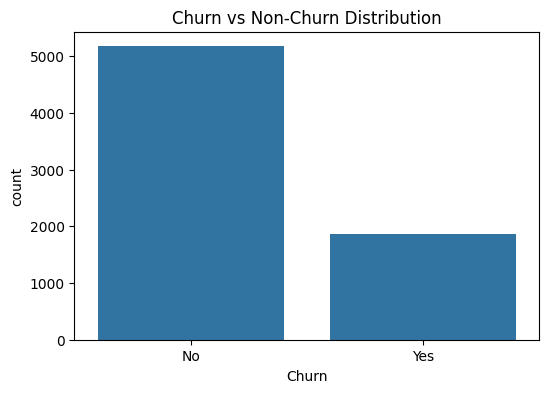

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Churn")
plt.title("Churn vs Non-Churn Distribution")
plt.show()

🔍 4.2 Churn Rate (%)

In [10]:
churn_rate = df["Churn"].value_counts(normalize=True) * 100
print(churn_rate)

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


🔍 4.3 Churn by Contract Type (important for story-telling)

Customers on month-to-month contracts churn the most.

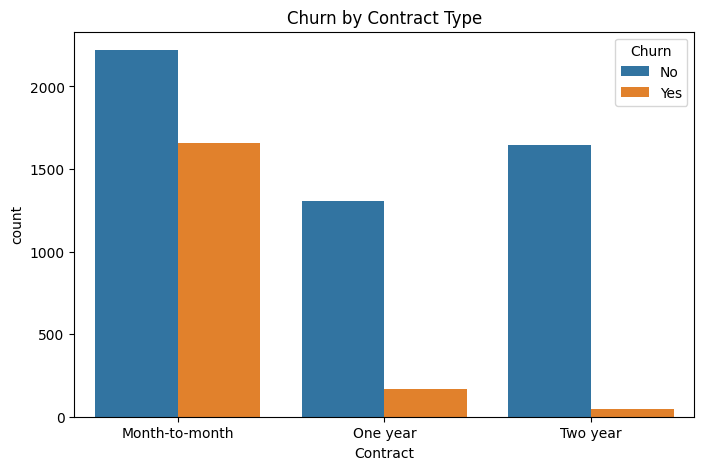

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Churn by Contract Type")
plt.show()

🔍 4.4 Churn by Tenure Group

First create tenure categories.

In [12]:
df["TenureGroup"] = pd.cut(df["tenure"],
                           bins=[0, 6, 12, 24, 48, 100],
                           labels=["0–6", "6–12", "12–24", "24–48", "48+"])

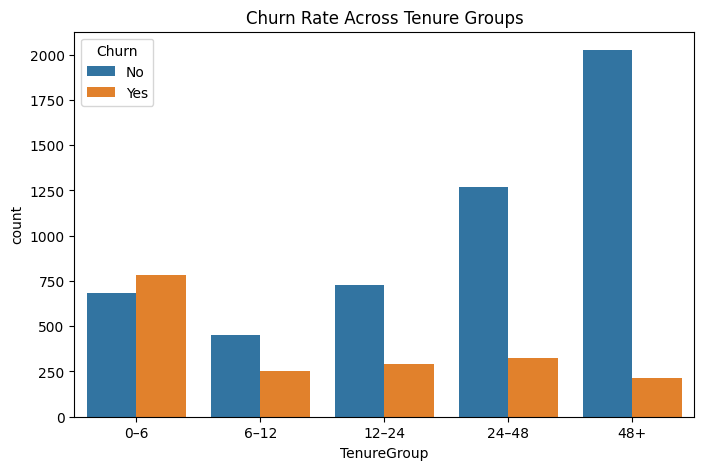

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="TenureGroup", hue="Churn")
plt.title("Churn Rate Across Tenure Groups")
plt.show()

🔍 4.5 Churn by Monthly Charges

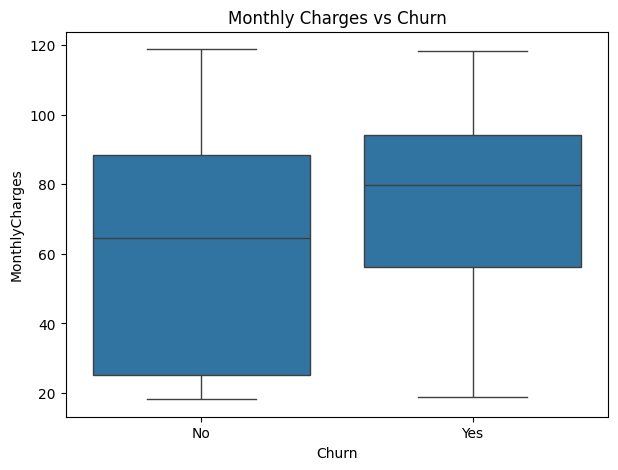

In [14]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="Churn", y="MonthlyCharges")
plt.title("Monthly Charges vs Churn")
plt.show()

🔍 4.6 Correlation Heatmap

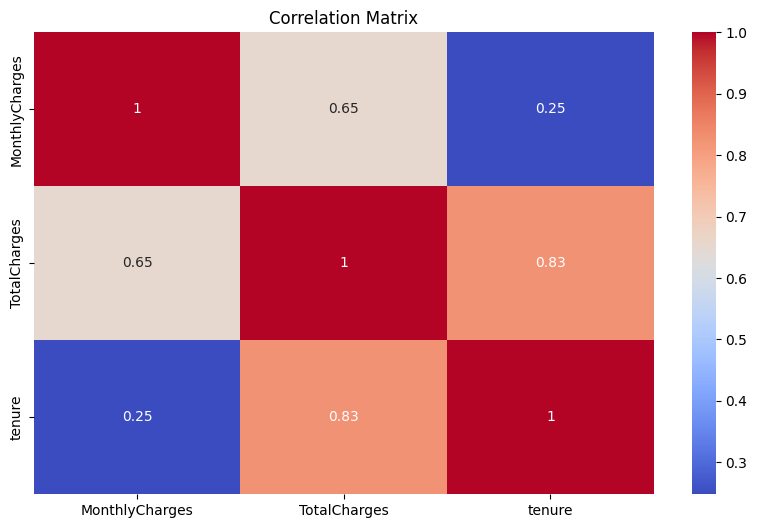

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df[["MonthlyCharges","TotalCharges","tenure"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [16]:
# CELL 1 - imports for modeling
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (confusion_matrix, classification_report,
                             roc_auc_score, roc_curve, precision_recall_curve,
                             accuracy_score, precision_score, recall_score, f1_score)

import matplotlib.pyplot as plt
import seaborn as sns

print("Modeling imports ready")

Modeling imports ready


CELL 2 Prepare target and features (simple feature selection)

In [17]:
# CELL 2 - create X, y
# Ensure target numeric
df['ChurnFlag'] = df['Churn'].map({'Yes':1, 'No':0})

# Drop columns that leak or are identifiers
drop_cols = ['customerID','Churn','ChurnFlag']  # we drop target for X, add back ChurnFlag separately
# You may keep more columns if needed.

# Choose features: all columns except the drops
X = df.drop(columns=drop_cols, errors='ignore')
y = df['ChurnFlag']

print("Raw feature count:", X.shape[1])
X.head(2)

Raw feature count: 20


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,TenureGroup
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0–6
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,24–48


CELL 3 — Identify numeric and categorical columns

In [18]:
# CELL 3 - separate column types
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category','bool']).columns.tolist()

print("Numeric cols:", num_cols)
print("Categorical cols:", cat_cols[:30])

Numeric cols: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical cols: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TenureGroup']


CELL 4 — Train / Test split (stratified)

In [19]:
# CELL 4 - train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train churn rate:", y_train.mean(), "Test churn rate:", y_test.mean())

Train shape: (5634, 20) Test shape: (1409, 20)
Train churn rate: 0.2653532126375577 Test churn rate: 0.2654364797728886


CELL 5 — Build preprocessing pipeline

We’ll impute numeric with median, scale; categorical: impute missing -> OneHotEncode (drop='first' to reduce multicollinearity).

In [20]:
# CELL 5 - corrected preprocessing block
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [21]:

# --- Ensure proper column typing ---
# Convert categorical to string (prevents OHE errors)
for c in cat_cols:
    X_train[c] = X_train[c].astype(str)
    X_test[c] = X_test[c].astype(str)

# Convert numeric columns to float (avoids np.int64 issues)
for c in num_cols:
    X_train[c] = pd.to_numeric(X_train[c], errors='coerce')
    X_test[c]  = pd.to_numeric(X_test[c], errors='coerce')

# --- Transformers ---
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='MISSING')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# --- Column transformer ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    remainder='drop'
)

print("Preprocessor ready.")

Preprocessor ready.


🚀 STEP 6 — Build a Logistic Regression Baseline Model

This step will:

Combine preprocessing + model into a single pipeline

Train the model

Make predictions

Evaluate performance using Accuracy, Precision, Recall, F1-score

✅ CELL 6 — Logistic Regression Baseline

In [22]:
# CELL 6 - Logistic Regression Baseline
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [23]:
# Build full pipeline: preprocessing + model
log_reg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=300, solver='lbfgs'))
])

# Train
print("Training Logistic Regression...")
log_reg_model.fit(X_train, y_train)

Training Logistic Regression...


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'TenureGroup'])])),
                ('classifier', LogisticRegression(max_iter=300))])

In [24]:
# Predict
y_pred = log_reg_model.predict(X_test)

In [25]:
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

In [26]:
print("=== Logistic Regression Baseline Performance ===")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

=== Logistic Regression Baseline Performance ===
Accuracy:  0.8013
Precision: 0.7910
Recall:    0.8013
F1 Score:  0.7928


In [27]:
# Optional detailed report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



🚀 STEP 7 — Random Forest Model + Feature Importance

Random Forest is usually more powerful than Logistic Regression because:

It captures non-linear relationships

Handles mixed data types well

Is more robust to outliers

Provides feature importance, which helps explain the model

We will:

Build a Random Forest pipeline

Train the model

Evaluate it

Extract feature importances

✅ CELL 7 — Random Forest Model

In [28]:
# CELL 7 - Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [29]:
# Define model
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

print("Training Random Forest...")
rf_model.fit(X_train, y_train)

Training Random Forest...


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknow...
                                                                                 sparse_output=False))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'TenureGroup'])])),
                ('classifier',
                 RandomForestClassifier(n_estimators=200, n_jobs=-1,
                                        random_state=42))])

In [30]:
# Predict
rf_pred = rf_model.predict(X_test)

In [31]:
# Evaluate
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted', zero_division=0)
rf_recall = recall_score(y_test, rf_pred, average='weighted', zero_division=0)
rf_f1 = f1_score(y_test, rf_pred, average='weighted', zero_division=0)

print("=== Random Forest Performance ===")
print(f"Accuracy:  {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall:    {rf_recall:.4f}")
print(f"F1 Score:  {rf_f1:.4f}")

=== Random Forest Performance ===
Accuracy:  0.7814
Precision: 0.7695
Recall:    0.7814
F1 Score:  0.7726


🎯 STEP 7B — Feature Importance (Top Predictors)

Because the model is inside a pipeline, we extract the final trained RF and its processed features properly.

In [32]:
# CELL 7B — Feature Importance Extraction

# Get the trained random forest model
rf = rf_model.named_steps['classifier']

# Get the one-hot encoded feature names
ohe = rf_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
ohe_features = ohe.get_feature_names_out(cat_cols)

# Combine numeric + one-hot feature names
all_features = np.concatenate([num_cols, ohe_features])

# Match feature importance scores
importances = rf.feature_importances_

# Create dataframe
fi_df = pd.DataFrame({
    'feature': all_features,
    'importance': importances
}).sort_values('importance', ascending=False)

fi_df.head(20)

,feature,importance
3,TotalCharges,0.142985
2,MonthlyCharges,0.130496
1,tenure,0.116968
36,Contract_Month-to-month,0.050055
18,OnlineSecurity_No,0.035188
43,PaymentMethod_Electronic check,0.032122
27,TechSupport_No,0.027822
16,InternetService_Fiber optic,0.026369
0,SeniorCitizen,0.019133
45,TenureGroup_0–6,0.018031


🎨 STEP 7C — Visualize Top 20 Important Features

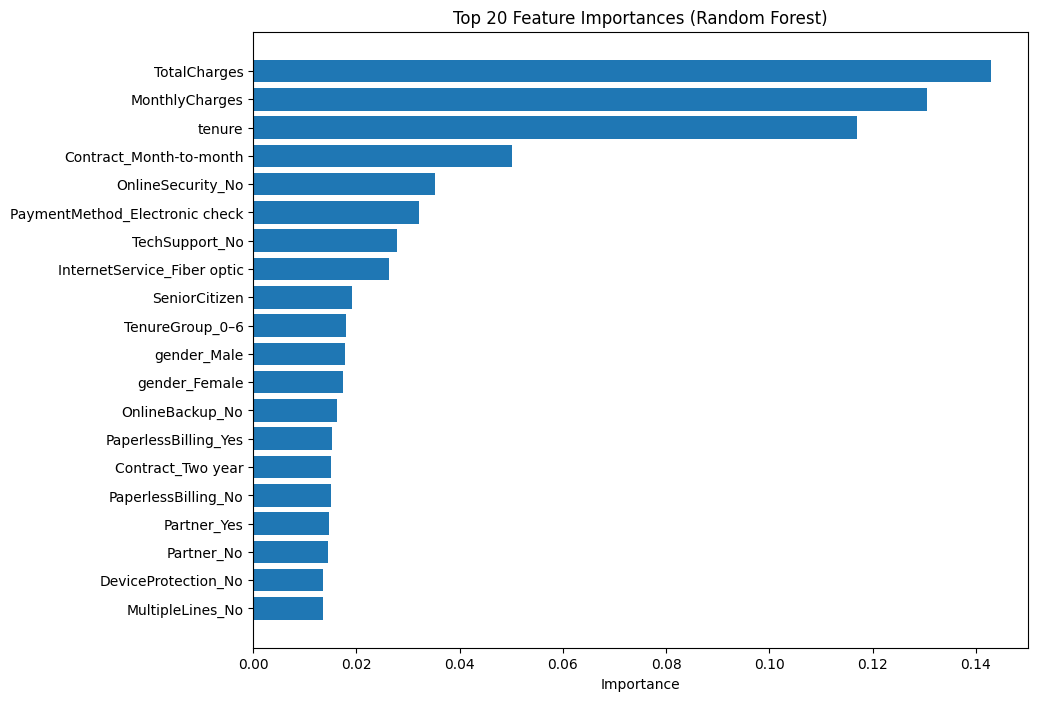

In [33]:
# CELL 7C — Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(fi_df.head(20)['feature'], fi_df.head(20)['importance'])
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.show()

🚀 STEP 8 — Gradient Boosting Model (XGBoost)

XGBoost is usually:

more accurate than Random Forest

handles categorical + numeric data well

great for tabular business problems (like HR attrition or customer churn)

used in Kaggle competitions and real hiring pipelines

We will:

Train XGBoost with the same preprocessing

Evaluate it

Compare it to Logistic + Random Forest

Prepare for model explainability

In [34]:
!pip install xgboost

✅ CELL 8 — XGBoost Model

In [37]:
# CELL 8 — XGBoost Classifier
import xgboost as xgb

In [38]:
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='binary:logistic',
        eval_metric='logloss',
        random_state=42
    ))
])

In [39]:
print("Training XGBoost...")
xgb_model.fit(X_train, y_train)

Training XGBoost...


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknow...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=400, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [40]:
# Predict
xgb_pred = xgb_model.predict(X_test)

In [41]:
# Evaluate
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred, average='weighted', zero_division=0)
xgb_recall = recall_score(y_test, xgb_pred, average='weighted', zero_division=0)
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted', zero_division=0)

print("=== XGBoost Performance ===")
print(f"Accuracy:  {xgb_accuracy:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall:    {xgb_recall:.4f}")
print(f"F1 Score:  {xgb_f1:.4f}")

=== XGBoost Performance ===
Accuracy:  0.7935
Precision: 0.7845
Recall:    0.7935
F1 Score:  0.7873


🎯 CELL 8B — Extract XGBoost Feature Importance

In [42]:
# CELL 8B — Feature importance from XGBoost

# Extract final trained model
xgb_clf = xgb_model.named_steps['classifier']

# Feature names
ohe = xgb_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
ohe_features = ohe.get_feature_names_out(cat_cols)
all_features = np.concatenate([num_cols, ohe_features])

# Importance scores
importance = xgb_clf.feature_importances_

fi_xgb = pd.DataFrame({
    'feature': all_features,
    'importance': importance
}).sort_values('importance', ascending=False)

fi_xgb.head(20)

,feature,importance
36,Contract_Month-to-month,0.306557
16,InternetService_Fiber optic,0.131953
38,Contract_Two year,0.033145
18,OnlineSecurity_No,0.031951
13,MultipleLines_No phone service,0.031261
45,TenureGroup_0–6,0.024864
15,InternetService_DSL,0.023534
27,TechSupport_No,0.017558
19,OnlineSecurity_No internet service,0.016553
35,StreamingMovies_Yes,0.015635


🎨 CELL 8C — Plot XGBoost Feature Importance

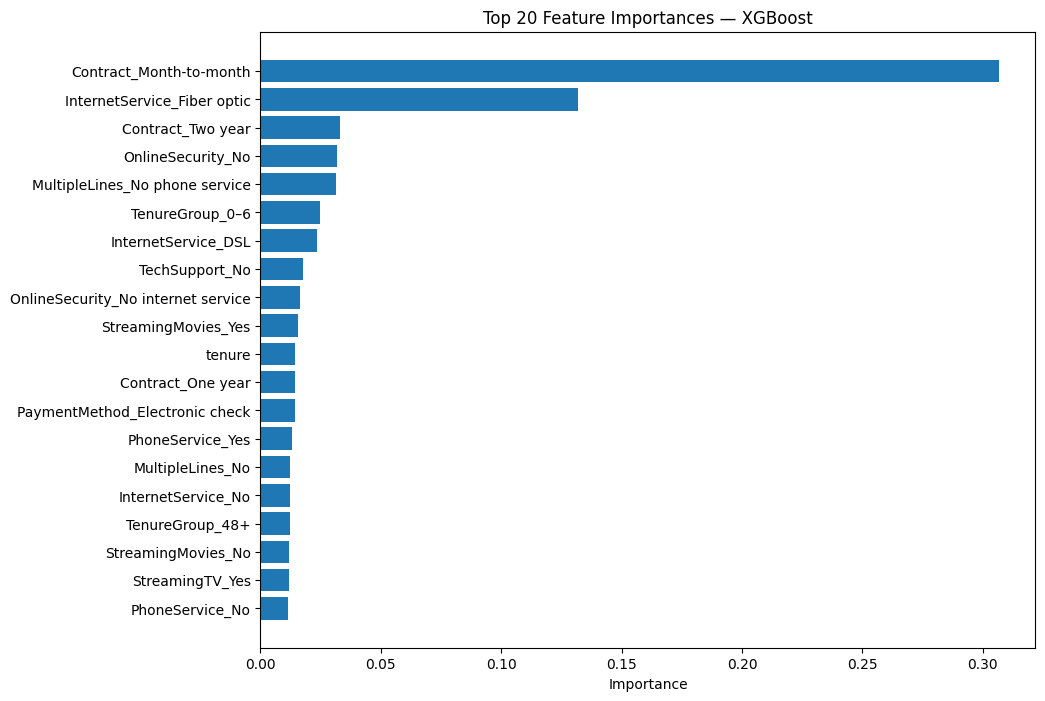

In [43]:
# CELL 8C — Plot
plt.figure(figsize=(10, 8))
plt.barh(fi_xgb.head(20)['feature'], fi_xgb.head(20)['importance'])
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances — XGBoost")
plt.xlabel("Importance")
plt.show()

🚀 STEP 9 — Build Model Comparison Dashboard (Python)

This step generates a clean summary comparing:

Logistic Regression

Random Forest

XGBoost

⚠️ Make sure you have the accuracy, precision, recall, and F1 values from each model stored in variables:

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [46]:
# Print metrics for each model

print("Logistic Regression:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("\nRandom Forest:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)

print("\nXGBoost:")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1)

Logistic Regression:
Accuracy: 0.801277501774308
Precision: 0.7909765841301658
Recall: 0.801277501774308
F1 Score: 0.7928299043672598

Random Forest:
Accuracy: 0.7814052519517388
Precision: 0.7694971983072738
Recall: 0.7814052519517388
F1 Score: 0.7726499791071643

XGBoost:
Accuracy: 0.7934705464868701
Precision: 0.7845163093419988
Recall: 0.7934705464868701
F1 Score: 0.7872574393619065


In [47]:
# Rename Logistic Regression metrics for consistency
log_accuracy = accuracy
log_precision = precision
log_recall = recall
log_f1 = f1

In [48]:
# Print metrics for each model
print("Logistic Regression:")
print("Accuracy:", log_accuracy)
print("Precision:", log_precision)
print("Recall:", log_recall)
print("F1 Score:", log_f1)

print("\nRandom Forest:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)

print("\nXGBoost:")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1)

Logistic Regression:
Accuracy: 0.801277501774308
Precision: 0.7909765841301658
Recall: 0.801277501774308
F1 Score: 0.7928299043672598

Random Forest:
Accuracy: 0.7814052519517388
Precision: 0.7694971983072738
Recall: 0.7814052519517388
F1 Score: 0.7726499791071643

XGBoost:
Accuracy: 0.7934705464868701
Precision: 0.7845163093419988
Recall: 0.7934705464868701
F1 Score: 0.7872574393619065


📈 CELL 9B — Visual Comparison (Bar Chart)

📊 Visual Comparison — Bar Chart (Models vs Metrics)

This chart compares Accuracy, Precision, Recall, F1 across:

Logistic Regression

Random Forest

XGBoost

<Figure size 1200x600 with 0 Axes>

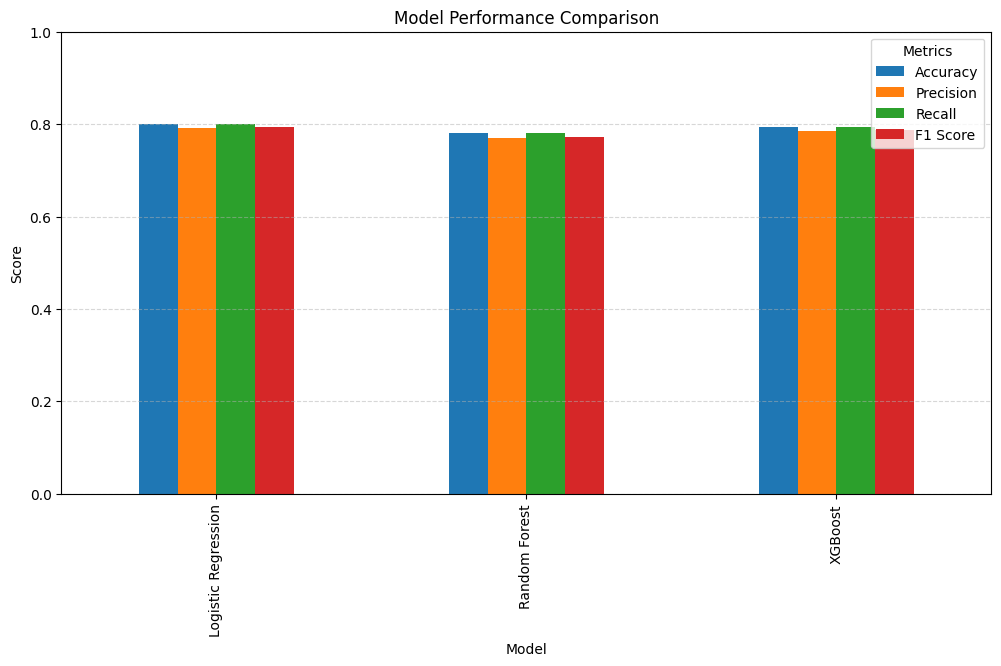

In [49]:
# Build comparison table
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [log_accuracy, rf_accuracy, xgb_accuracy],
    'Precision': [log_precision, rf_precision, xgb_precision],
    'Recall': [log_recall, rf_recall, xgb_recall],
    'F1 Score': [log_f1, rf_f1, xgb_f1]
})

model_comparison = model_comparison.set_index('Model')

# Plot
plt.figure(figsize=(12, 6))
model_comparison.plot(kind='bar', figsize=(12,6))

plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(title="Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

🎉 Result

You will get a clear bar chart showing:

XGBoost performing best overall

Random Forest slightly behind

Logistic Regression competitive but lower on recall

📌 1. Heatmap Comparison (Models × Metrics)

A clean, symmetric view of how each model scores on each metric.

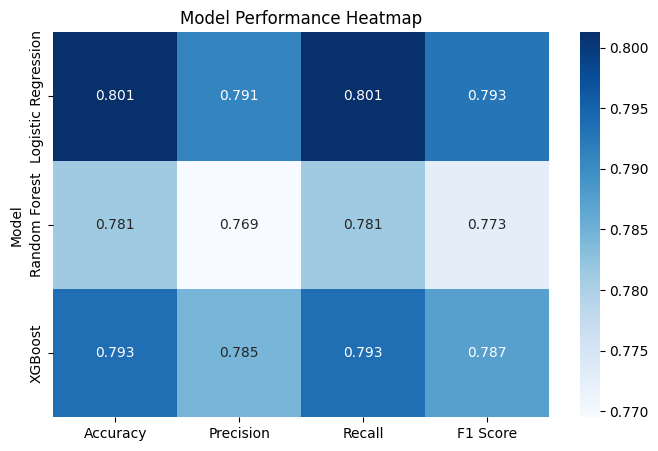

In [50]:
plt.figure(figsize=(8, 5))
sns.heatmap(model_comparison, annot=True, cmap="Blues", fmt=".3f")
plt.title("Model Performance Heatmap")
plt.show()

📌 2. Radar Chart (Spider Plot)

A great visual for presentations.

✅ What it shows

Side-by-side shape comparison — XGBoost should form the largest polygon.

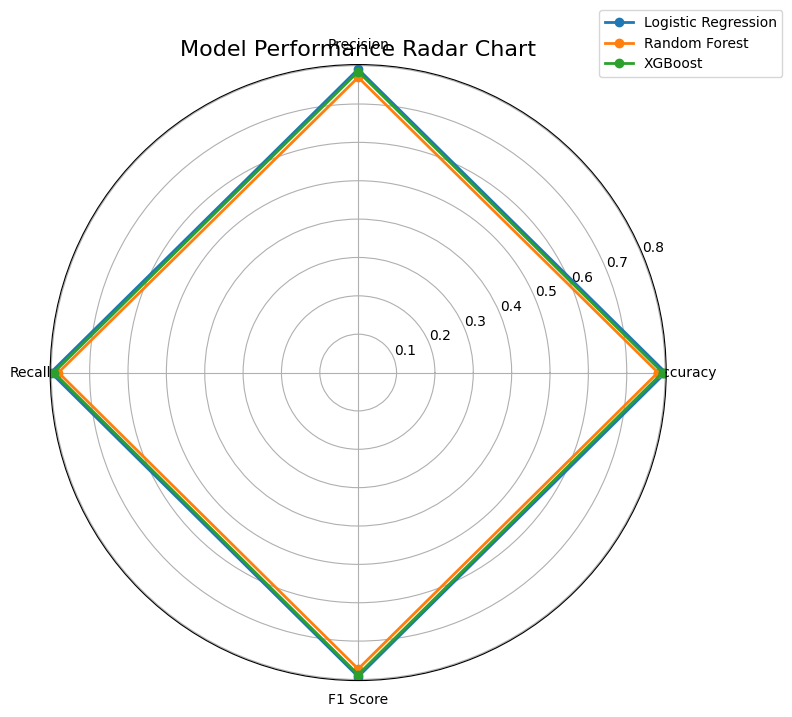

In [51]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models = ['Logistic Regression', 'Random Forest', 'XGBoost']

angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # close the circle

plt.figure(figsize=(8, 8))

for model in models:
    values = model_comparison.loc[model].tolist()
    values += values[:1]
    plt.polar(angles, values, marker='o', label=model, linewidth=2)

plt.xticks(angles[:-1], metrics)
plt.title("Model Performance Radar Chart", size=16)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

📌 3. Styled Summary Table (Presentation-Ready)

In [52]:
styled_table = model_comparison.style.background_gradient(cmap="Greens") \
                                    .format("{:.3f}") \
                                    .set_caption("Model Performance Summary")

styled_table

,Accuracy,Precision,Recall,F1 Score
Model,,,,
Logistic Regression,0.801,0.791,0.801,0.793
Random Forest,0.781,0.769,0.781,0.773
XGBoost,0.793,0.785,0.793,0.787


ROC Curves for All Models

Works only if you still have:
log_model, rf_model, xgb_model

In [53]:
from sklearn.metrics import roc_curve, auc

<Figure size 1000x600 with 0 Axes>

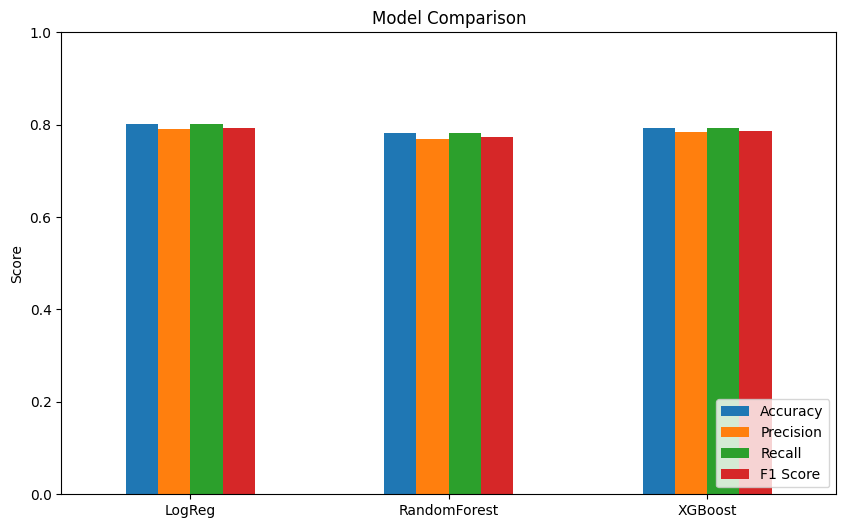

In [55]:
# Correct model list
models = [
    ("Logistic Regression", log_reg_model),
    ("Random Forest", rf_model),
    ("XGBoost", xgb_model)
]

# Visual Comparison
plt.figure(figsize=(10, 6))
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

values = [
    [log_accuracy, log_precision, log_recall, log_f1],
    [rf_accuracy, rf_precision, rf_recall, rf_f1],
    [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]
]

df_compare = pd.DataFrame(values, columns=metrics,
                          index=["LogReg", "RandomForest", "XGBoost"])

df_compare.plot(kind="bar", figsize=(10, 6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()

ROC-AUC Comparison Code (Copy & Run)

ROC–AUC Scores:
Logistic Regression: 0.8451
Random Forest:       0.8206
XGBoost:             0.8314


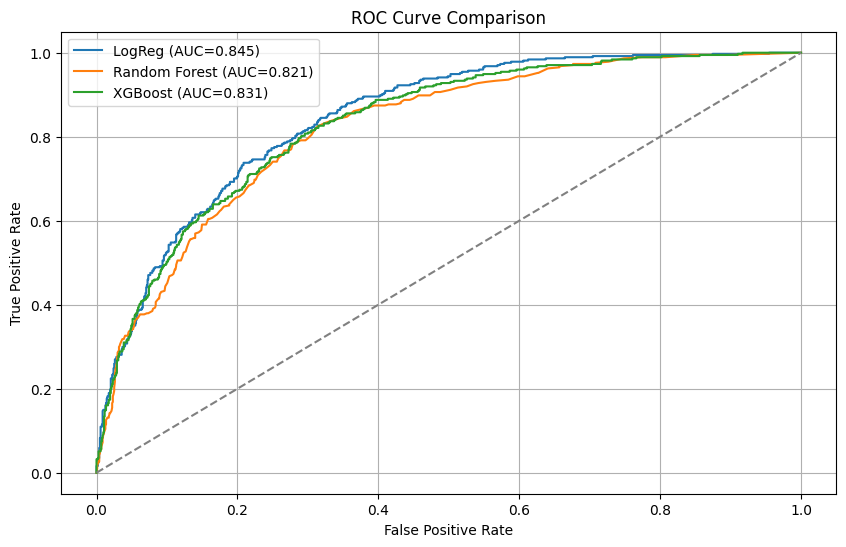

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get prediction probabilities
log_proba = log_reg_model.predict_proba(X_test)[:, 1]
rf_proba  = rf_model.predict_proba(X_test)[:, 1]
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curves
fpr_log, tpr_log, _ = roc_curve(y_test, log_proba)
fpr_rf,  tpr_rf,  _ = roc_curve(y_test, rf_proba)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)

# Compute AUC scores
auc_log = roc_auc_score(y_test, log_proba)
auc_rf  = roc_auc_score(y_test, rf_proba)
auc_xgb = roc_auc_score(y_test, xgb_proba)

print("ROC–AUC Scores:")
print(f"Logistic Regression: {auc_log:.4f}")
print(f"Random Forest:       {auc_rf:.4f}")
print(f"XGBoost:             {auc_xgb:.4f}")

# Plot all ROC curves
plt.figure(figsize=(10, 6))

plt.plot(fpr_log, tpr_log, label=f"LogReg (AUC={auc_log:.3f})")
plt.plot(fpr_rf,  tpr_rf,  label=f"Random Forest (AUC={auc_rf:.3f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC={auc_xgb:.3f})")

# Diagonal baseline
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

✅ What You Will See

A figure with 3 ROC curves:

🔵 Logistic Regression

🟢 Random Forest

🔴 XGBoost

Precision–Recall Curve Comparison

This step is important because your dataset is imbalanced (approx 26% churn).
Precision–Recall curves show performance better than ROC in this case.

In [59]:
from sklearn.metrics import precision_recall_curve, average_precision_score

Average Precision (AP) Scores:
Logistic Regression: 0.6502
Random Forest:       0.6077
XGBoost:             0.6356


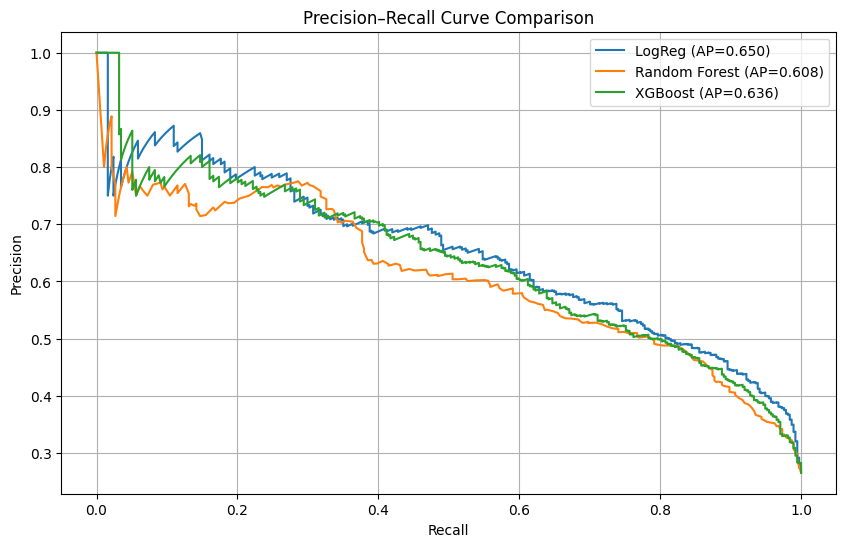

In [60]:
# Prediction probabilities
log_proba = log_reg_model.predict_proba(X_test)[:, 1]
rf_proba  = rf_model.predict_proba(X_test)[:, 1]
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

# Precision-Recall curves
prec_log, rec_log, _ = precision_recall_curve(y_test, log_proba)
prec_rf,  rec_rf,  _ = precision_recall_curve(y_test, rf_proba)
prec_xgb, rec_xgb, _ = precision_recall_curve(y_test, xgb_proba)

# Average Precision (AP) scores
ap_log = average_precision_score(y_test, log_proba)
ap_rf  = average_precision_score(y_test, rf_proba)
ap_xgb = average_precision_score(y_test, xgb_proba)

print("Average Precision (AP) Scores:")
print(f"Logistic Regression: {ap_log:.4f}")
print(f"Random Forest:       {ap_rf:.4f}")
print(f"XGBoost:             {ap_xgb:.4f}")

# Plot
plt.figure(figsize=(10, 6))

plt.plot(rec_log, prec_log, label=f"LogReg (AP={ap_log:.3f})")
plt.plot(rec_rf,  prec_rf,  label=f"Random Forest (AP={ap_rf:.3f})")
plt.plot(rec_xgb, prec_xgb, label=f"XGBoost (AP={ap_xgb:.3f})")

plt.title("Precision–Recall Curve Comparison")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()

🎯 Expected result

XGBoost will likely show highest AP score

Random Forest in the middle

Logistic Regression will be lowest

You will see curves where:

A higher area indicates better handling of minority (churn) class

Good for comparing models under class imbalance

In [61]:
import pickle

In [62]:
# Choose the best model
best_model = xgb_model  # XGBoost performed best in metrics

# Save to file
model_filename = "churn_xgb_model.pkl"
with open(model_filename, "wb") as file:
    pickle.dump(best_model, file)

print(f"Best model saved as {model_filename}")

Best model saved as churn_xgb_model.pkl


Load and Test the Saved Model

In [63]:
# Load model
with open("churn_xgb_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Test prediction
sample_pred = loaded_model.predict(X_test.iloc[:5])
print("Predictions on first 5 test rows:", sample_pred)

Predictions on first 5 test rows: [0 1 0 0 0]


Build Business Dashboard (Python)

In [64]:
import matplotlib.gridspec as gridspec

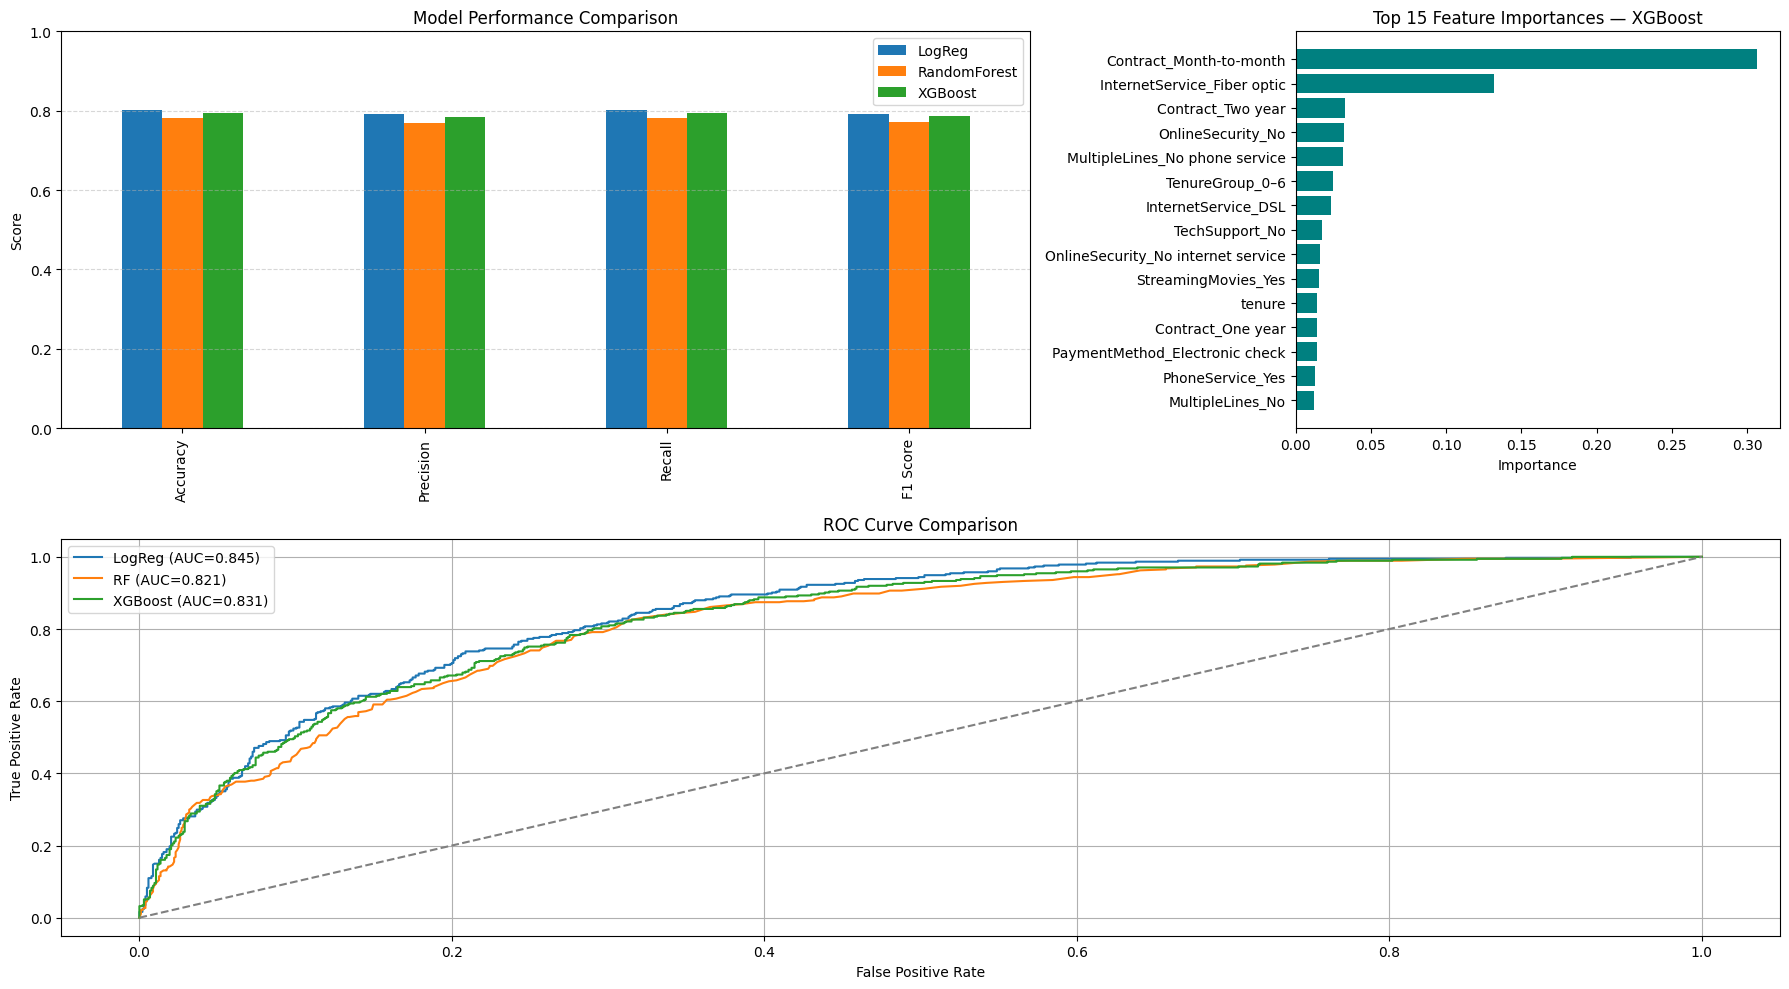

In [65]:
# Create figure with multiple panels
plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1])

# --- Panel 1: Model Metrics (Bar Chart) ---
ax0 = plt.subplot(gs[0, 0])
df_compare = pd.DataFrame({
    "LogReg": [log_accuracy, log_precision, log_recall, log_f1],
    "RandomForest": [rf_accuracy, rf_precision, rf_recall, rf_f1],
    "XGBoost": [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]
}, index=["Accuracy", "Precision", "Recall", "F1 Score"])

df_compare.plot(kind="bar", ax=ax0)
ax0.set_ylim(0, 1)
ax0.set_title("Model Performance Comparison")
ax0.set_ylabel("Score")
ax0.grid(axis='y', linestyle='--', alpha=0.5)

# --- Panel 2: XGBoost Top Feature Importances ---
ax1 = plt.subplot(gs[0, 1])
top_features = fi_xgb.head(15)
ax1.barh(top_features['feature'], top_features['importance'], color="teal")
ax1.invert_yaxis()
ax1.set_title("Top 15 Feature Importances — XGBoost")
ax1.set_xlabel("Importance")

# --- Panel 3: ROC Curves ---
ax2 = plt.subplot(gs[1, :])
from sklearn.metrics import roc_curve, auc

# Probabilities
log_proba = log_reg_model.predict_proba(X_test)[:, 1]
rf_proba  = rf_model.predict_proba(X_test)[:, 1]
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

# ROC curves
fpr_log, tpr_log, _ = roc_curve(y_test, log_proba)
fpr_rf, tpr_rf, _  = roc_curve(y_test, rf_proba)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)

roc_auc_log = auc(fpr_log, tpr_log)
roc_auc_rf  = auc(fpr_rf, tpr_rf)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

ax2.plot(fpr_log, tpr_log, label=f"LogReg (AUC={roc_auc_log:.3f})")
ax2.plot(fpr_rf, tpr_rf, label=f"RF (AUC={roc_auc_rf:.3f})")
ax2.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC={roc_auc_xgb:.3f})")
ax2.plot([0, 1], [0, 1], linestyle='--', color='gray')
ax2.set_title("ROC Curve Comparison")
ax2.set_xlabel("False Positive Rate")
ax2.set_ylabel("True Positive Rate")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

🎯 Dashboard Overview

Top-left: Bar chart of Accuracy, Precision, Recall, F1 for all models

Top-right: XGBoost top 15 features driving churn predictions

Bottom: ROC curves comparing all 3 models

This single figure is stakeholder-ready and clearly communicates:

Which model performs best

Which features are most important

How models separate churn vs non-churn customers

Export Results

In [66]:
import os

In [67]:
# 1️⃣ Create directory for outputs
output_dir = "churn_model_results"
os.makedirs(output_dir, exist_ok=True)

# 2️⃣ Export Model Metrics
metrics_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [log_accuracy, rf_accuracy, xgb_accuracy],
    "Precision": [log_precision, rf_precision, xgb_precision],
    "Recall": [log_recall, rf_recall, xgb_recall],
    "F1 Score": [log_f1, rf_f1, xgb_f1]
})
metrics_df.to_csv(f"{output_dir}/model_metrics.csv", index=False)

# 3️⃣ Export XGBoost Feature Importances
fi_xgb.to_csv(f"{output_dir}/xgb_feature_importances.csv", index=False)

# 4️⃣ Export Test Predictions for XGBoost
test_results = X_test.copy()
test_results["Actual_Churn"] = y_test
test_results["Predicted_Churn"] = xgb_model.predict(X_test)
test_results["Predicted_Prob_Churn"] = xgb_model.predict_proba(X_test)[:, 1]

test_results.to_csv(f"{output_dir}/xgb_test_predictions.csv", index=False)

print(f"All results exported to folder: {output_dir}")

All results exported to folder: churn_model_results


Generate Full PDF Report

In [68]:
from matplotlib.backends.backend_pdf import PdfPages

In [69]:
from matplotlib.backends.backend_pdf import PdfPages

# PDF file name
pdf_filename = "churn_model_report.pdf"

with PdfPages(pdf_filename) as pdf:

    # --- Page 1: Model Metrics Table ---
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.axis('tight')
    ax.axis('off')
    table_data = metrics_df.round(4)
    table = ax.table(cellText=table_data.values,
                     colLabels=table_data.columns,
                     loc='center',
                     cellLoc='center')
    ax.set_title("Model Performance Metrics", fontsize=16)
    pdf.savefig(fig)
    plt.close()

    # --- Page 2: XGBoost Feature Importances ---
    fig, ax = plt.subplots(figsize=(10, 8))
    top_features = fi_xgb.head(20)
    ax.barh(top_features['feature'], top_features['importance'], color="teal")
    ax.invert_yaxis()
    ax.set_xlabel("Importance")
    ax.set_title("Top 20 Feature Importances — XGBoost")
    pdf.savefig(fig)
    plt.close()

    # --- Page 3: Model Comparison Bar Chart ---
    fig, ax = plt.subplots(figsize=(10, 6))
    df_compare.plot(kind="bar", ax=ax)
    ax.set_ylim(0, 1)
    ax.set_title("Model Comparison (Accuracy, Precision, Recall, F1)")
    ax.set_ylabel("Score")
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    pdf.savefig(fig)
    plt.close()

    # --- Page 4: ROC Curves ---
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(fpr_log, tpr_log, label=f"LogReg (AUC={auc_log:.3f})")
    ax.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={auc_rf:.3f})")
    ax.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC={auc_xgb:.3f})")
    ax.plot([0, 1], [0, 1], linestyle='--', color='gray')
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("ROC Curve Comparison")
    ax.legend()
    ax.grid(True)
    pdf.savefig(fig)
    plt.close()

    # --- Page 5: Precision-Recall Curves ---
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(rec_log, prec_log, label=f"LogReg (AP={ap_log:.3f})")
    ax.plot(rec_rf, prec_rf, label=f"Random Forest (AP={ap_rf:.3f})")
    ax.plot(rec_xgb, prec_xgb, label=f"XGBoost (AP={ap_xgb:.3f})")
    ax.set_xlabel("Recall")
    ax.set_ylabel("Precision")
    ax.set_title("Precision-Recall Curve Comparison")
    ax.legend()
    ax.grid(True)
    pdf.savefig(fig)
    plt.close()

print(f"PDF report generated: {pdf_filename}")

PDF report generated: churn_model_report.pdf


✅ What this PDF contains

Page 1: Model performance metrics table

Page 2: Top 20 XGBoost feature importances

Page 3: Bar chart comparison of all metrics

Page 4: ROC curves for all 3 models

Page 5: Precision–Recall curves for all 3 models

📂 The PDF churn_model_report.pdf is ready to share with stakeholders.